In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preprocessing and Exploration

In [2]:
# Get dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
# Drop duplicate rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      536641 non-null object
StockCode      536641 non-null object
Description    535187 non-null object
Quantity       536641 non-null int64
InvoiceDate    536641 non-null datetime64[ns]
UnitPrice      536641 non-null float64
CustomerID     401604 non-null float64
Country        536641 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


Some CustomerID having null values. Because we would like to find the association of products, let's fill missing CustomerID as 0, then we can ignore it completely.

In [4]:
# Fill missing CusotmerID
df["CustomerID"].fillna("0",inplace=True)

In [5]:
# Convert data type
df["CustomerID"] = df["CustomerID"].astype('int')
df["CustomerID"] = df["CustomerID"].astype('str')

Now the CustomerID data type has been convereted, let's find the statistics summary of every columns.

In [6]:
# Assess object/string columns
df.describe(include="object")

,InvoiceNo,StockCode,Description,CustomerID,Country
count,536641,536641,535187,536641,536641
unique,25900,4070,4223,4373,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0,United Kingdom
freq,1114,2301,2357,135037,490300


In [7]:
# Assess numeric columns
df.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [8]:
df.loc[df["Quantity"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


UnitPrice and Quantity column seems have some false values as there are some negative values. All of zero and negative values should be dropped.

In [9]:
# Remove rows with zero or negative quantity or unitprice
df = df.loc[df["Quantity"]>0,:]
df = df.loc[df["UnitPrice"]>0,:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      524878 non-null object
StockCode      524878 non-null object
Description    524878 non-null object
Quantity       524878 non-null int64
InvoiceDate    524878 non-null datetime64[ns]
UnitPrice      524878 non-null float64
CustomerID     524878 non-null object
Country        524878 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.0+ MB


[Text(0, 0.5, 'Products Sold'),
 Text(0.5, 0, 'Country'),
 Text(0.5, 1.0, 'Top 5 Countries with the Highest Product Sales')]

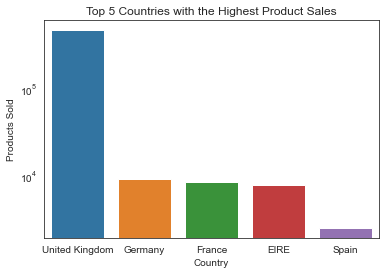

In [10]:
# Plot top 5 countries having highest product sales
sns.set_style("white")
g = sns.countplot(x="Country",data=df, order=df.Country.value_counts().iloc[:5].index)
g.set_yscale("log")
g.set(xlabel='Country', ylabel='Products Sold', title="Top 5 Countries with the Highest Product Sales")

It looks like most of the products are sold in the UK. This may affect our final analysis. Therefore, the final modelling phase would only choose two of these top five countries, which are UK and Germany.

In [11]:
# Check outlier points
def check_outlier(df_in, col_name, low, up):
    q1 = df_in[col_name].quantile(low)
    q3 = df_in[col_name].quantile(up)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print("Bottom and Top Outlier Threshold for",col_name)
    print("Lower:",fence_low)
    print("Upper:",fence_high,"\n")
    

check_outlier(df, "Quantity", 0.25, 0.75)
check_outlier(df, "UnitPrice", 0.25, 0.75)

Bottom and Top Outlier Threshold for Quantity
Lower: -14.0
Upper: 26.0 

Bottom and Top Outlier Threshold for UnitPrice
Lower: -3.0700000000000003
Upper: 8.45 



The outlier threshold value seems not dispersed enough. It's still reasonable when a person ordered 26 same items or some of the products priced as 8.45. Let's change the upper quantile as 0.95 instead

In [12]:
# Check outlier with increased threshold
check_outlier(df, "Quantity", 0.05, 0.95)
check_outlier(df, "UnitPrice", 0.05, 0.95)

Bottom and Top Outlier Threshold for Quantity
Lower: -42.5
Upper: 73.5 

Bottom and Top Outlier Threshold for UnitPrice
Lower: -13.874999999999998
Upper: 24.244999999999997 



With the upper threshold as 73.5, it might be a good unit choice. Let's remove such rows when the quantity is over than 73.5. But with the UnitPrice, it might still reasonable with the price is 23. Let's find out what kind of products having price over than 23.

In [13]:
# Find transaction when the UnitPrice is over than 23
df.loc[df["UnitPrice"]>23,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,13705,United Kingdom
294,536396,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,17850,United Kingdom
431,536406,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 11:33:00,35.75,17850,United Kingdom
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911,EIRE
1622,536544,22605,WOODEN CROQUET GARDEN SET,1,2010-12-01 14:32:00,25.49,0,United Kingdom
...,...,...,...,...,...,...,...,...
541424,581498,22424,ENAMEL BREAD BIN CREAM,1,2011-12-09 10:26:00,24.96,0,United Kingdom
541433,581498,22526,WHEELBARROW FOR CHILDREN,1,2011-12-09 10:26:00,24.96,0,United Kingdom
541459,581498,22838,3 TIER CAKE TIN RED AND CREAM,1,2011-12-09 10:26:00,29.17,0,United Kingdom
541527,581498,84968e,SET OF 16 VINTAGE BLACK CUTLERY,1,2011-12-09 10:26:00,24.96,0,United Kingdom


These products seems not an anomaly. But CARRIAGE and DOTCOM POSTAGE seems having different StockCode name format. For now, Let's move on to removing some abnormal quantity values.

In [14]:
# Remove Outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [15]:
# Removing outliers by quantity column
removed_outlier_df = remove_outlier(df, "Quantity")
removed_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515933 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      515933 non-null object
StockCode      515933 non-null object
Description    515933 non-null object
Quantity       515933 non-null int64
InvoiceDate    515933 non-null datetime64[ns]
UnitPrice      515933 non-null float64
CustomerID     515933 non-null object
Country        515933 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 35.4+ MB


In [16]:
# Finding correlations
removed_outlier_df.corr()

,Quantity,UnitPrice
Quantity,1.000000,-0.036602
UnitPrice,-0.036602,1.000000


The above columns seemed to be uncorrelated.

In [17]:
# Find the most frequently ordered products on each countries
grouped_country_frequencies = removed_outlier_df.groupby(["Country","Description"]).count().reset_index().sort_values("InvoiceNo",ascending=False).drop_duplicates(subset=["Country"]).iloc[:,:3]
grouped_country_frequencies.columns = ["Country","Most Ordered Product","Frequencies"]
grouped_country_frequencies.loc[grouped_country_frequencies["Frequencies"]>20,:]

,Country,Most Ordered Product,Frequencies
18922,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2169
8064,Germany,POSTAGE,374
6406,France,POSTAGE,300
3234,EIRE,CARRIAGE,106
1246,Belgium,POSTAGE,96
13266,Spain,POSTAGE,62
5260,Finland,POSTAGE,37
10599,Netherlands,POSTAGE,37
14520,Switzerland,POSTAGE,31
12061,Portugal,POSTAGE,30


The above products shown are mostly POSTAGE, and CARRIAGE doesn't sound like a name of product. I wonder what are these products about. Let's find out its price and ordered quantities.

In [18]:
# Check POSTAGE products
removed_outlier_df.loc[removed_outlier_df["Description"]=="POSTAGE"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany


In [19]:
# Check CARRAIGE products
removed_outlier_df.loc[removed_outlier_df["Description"]=="CARRIAGE"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932,Channel Islands
...,...,...,...,...,...,...,...,...
515000,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911,EIRE
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911,EIRE
518854,580124,C2,CARRIAGE,1,2011-12-01 17:12:00,50.0,0,EIRE
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911,EIRE


These may not be a real product, but it's some sort of payment. The Stock Code is weird as well. These doesn't look like a code of a specific product. Meanwhile, a product called RUSTIC SEVENTEEN DRAWER SIDEBOARD having StockCode 22827. So, let's remove these rows having name POSTAGE or CARRIAGE.

In [20]:
# Remove POSTAGE and CARRIAGE
products_only_df = removed_outlier_df.loc[(removed_outlier_df["Description"]!="POSTAGE")
                                          & 
                                         (removed_outlier_df["Description"]!="CARRIAGE")]
products_only_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


Now, let's find out the most ordered products on each countries, where the most ordered products should be over than 20.

In [21]:
# Find the most frequently ordered products on each countries
grouped_country_frequencies = products_only_df.groupby(["Country","Description"]).count().reset_index().sort_values("InvoiceNo",ascending=False).drop_duplicates(subset=["Country"]).iloc[:,:3]
grouped_country_frequencies.columns = ["Country","Most Ordered Product","Frequencies"]
grouped_country_frequencies.loc[grouped_country_frequencies["Frequencies"]>20,:]

,Country,Most Ordered Product,Frequencies
18894,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2169
8202,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,112
6476,France,RED TOADSTOOL LED NIGHT LIGHT,70
4328,EIRE,REGENCY CAKESTAND 3 TIER,70
1325,Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,38
13297,Spain,REGENCY CAKESTAND 3 TIER,22


Now the data seemed more reasonable, as we want to know which product mostly purchased at the same time. We would only use the above countries to find each of the most ordered products. Fortunately, as the previously visualized, UK and Germany seemed to be the top 2 countries. We'll choose these countries for our final analysis.

Before we do that, let's do further cleaning by checking the product name.

In [22]:
# Check duplicate stock code with different product name
duplicate_stock_desc = products_only_df.groupby('StockCode')['Description'].apply(lambda x: x.unique()).reset_index()["Description"]
for row in duplicate_stock_desc:
    if len(row)>1:
        print(row)

['VIPPASSPORT COVER ' 'VIP PASSPORT COVER ']
['LARGE CAKE TOWEL, CHOCOLATE SPOTS' 'LARGE CAKE TOWEL CHOCOLATE SPOTS']
['SWISS ROLL TOWEL, PINK  SPOTS' 'SWISS ROLL TOWEL PINK  SPOTS']
['GIN + TONIC DIET METAL SIGN' 'GIN AND TONIC DIET METAL SIGN']
['STRAWBERRY CERAMIC TRINKET BOX' 'STRAWBERRY CERAMIC TRINKET POT']
['PINK  POLKADOT PLATE ' 'PINK POLKADOT PLATE ']
['ELEPHANT, BIRTHDAY CARD, ' 'ELEPHANT BIRTHDAY CARD ']
['CHRISTMAS HANGING HEART WITH BELL' 'HANGING HEART WITH BELL']
['GLITTER CHRISTMAS HEART ' 'GLITTER HEART DECORATION']
['KEY FOB , GARAGE DESIGN' 'GARAGE KEY FOB']
['JUMBO BAG SCANDINAVIAN PAISLEY' 'JUMBO BAG SCANDINAVIAN BLUE PAISLEY']
['PARTY CONES CANDY TREE DECORATION' 'PARTY CONES CANDY DECORATION']
['LADLE LOVE HEART RED ' 'MINI LADLE LOVE HEART RED ']
['LADLE LOVE HEART PINK' 'MINI LADLE LOVE HEART PINK']
['SET 10 LIGHTS NIGHT OWL' 'SET 10 NIGHT OWL LIGHTS']
['SMALL POPCORN HOLDER' 'POPCORN HOLDER']
['FRYING PAN RED RETROSPOT' 'FRYING PAN RED POLKADOT ']
['MAGIC GAR

There are a lot of StockCode having multiple Description. If we were to use Description column for our final analysis, it would be much different than we use stock code instead. So, we could ignore them for now, and use StockCode column only for our modelling phase.

# Modelling  
In this phase, I would like to create a ruleset to find which itemset are mostly bought at the same time. This phase should differ for each country, as the items sold in UK should differ the item sold in Germany. We could use Apriori algorithm to choose which itemsets are recommended to be the promoted.

In [23]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Encoding
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
    
# Get product name by using StockCode
def get_product_desc(new_df, stockCode):
    print(stockCode,"is",new_df.loc[new_df["StockCode"]==stockCode,"Description"].values[0])
    
# Analysis function
def market_analysis(new_df,negara,support,mode):
    # Create new dataframe
    basket = (new_df.loc[new_df['Country'] ==negara] 
              .groupby(['InvoiceNo', 'StockCode'])['Quantity'] 
              .sum().unstack().reset_index().fillna(0) 
              .set_index('InvoiceNo')) 
    
    # Encoding the datasets 
    basket_encoded = basket.applymap(hot_encode) 
    
    # Building the model. Choose between apriori or fpgrowth
    if mode=="fpgrowth":
        frq_items = fpgrowth(basket_encoded, min_support = support, use_colnames = True) 
    elif mode=="apriori":
        frq_items = apriori(basket_encoded, min_support = support, use_colnames = True) 

    # Collecting the inferred rules in a dataframe 
    rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
    
    return rules

## Focus on UK Market

In [24]:
# Create ruleset on UK market
apriori_UK = market_analysis(products_only_df,"United Kingdom", 0.025, "apriori")
#fpgrowth_UK = market_analysis(products_only_df,"United Kingdom", 0.025, "fpgrowth")

In [25]:
apriori_UK

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
88,"(22698, 22699)",(22697),0.031051,0.053418,0.028060,0.903704,16.917450,0.026402,9.829885
86,"(22697, 22698)",(22699),0.032948,0.054511,0.028060,0.851658,15.623611,0.026264,6.373709
61,(22698),(22697),0.040193,0.053418,0.032948,0.819742,15.345685,0.030801,5.251274
64,(22698),(22699),0.040193,0.054511,0.031051,0.772532,14.172054,0.028860,4.156584
62,(22697),(22699),0.053418,0.054511,0.039963,0.748116,13.724145,0.037051,3.753672
...,...,...,...,...,...,...,...,...,...
57,(22423),(22699),0.096027,0.054511,0.025760,0.268263,4.921276,0.020526,1.292117
1,(85099B),(20712),0.100512,0.040826,0.026163,0.260297,6.375822,0.022059,1.296703
37,(85099B),(21929),0.100512,0.044391,0.026163,0.260297,5.863774,0.021701,1.291883
82,(85099B),(85099F),0.100512,0.040308,0.025875,0.257437,6.386716,0.021824,1.292405


In [26]:
apriori_UK.shape

(92, 9)

In [27]:
# Create transaction dataset from UK only
UK_products_df = products_only_df.loc[products_only_df["Country"]=="United Kingdom"]

In [28]:
# Get product name based on StockCode
get_product_desc(UK_products_df, 22698)
get_product_desc(UK_products_df, 22699)
get_product_desc(UK_products_df, 22697)
get_product_desc(UK_products_df,"85123A")
get_product_desc(UK_products_df, 21733)

22698 is PINK REGENCY TEACUP AND SAUCER
22699 is ROSES REGENCY TEACUP AND SAUCER 
22697 is GREEN REGENCY TEACUP AND SAUCER
85123A is WHITE HANGING HEART T-LIGHT HOLDER
21733 is RED HANGING HEART T-LIGHT HOLDER


We could see that PINK, ROSES, and GREEN REGENCY TEACUP AND SAUCER was most likely to be bought at the same time, while WHITE HANGING HEART T-LIGHT HOLDER and RED HANGING HEART T-LIGHT HOLDER was likely to be bought at the same time, but not as much as the teacup and saucer.  

Let's find an itemset where the support is the lowest while having at least 40% confidence

In [29]:
# Get ruleset where confidence is more than 0.4 and sort by support
apriori_UK.loc[apriori_UK["confidence"]>0.4].sort_values("support",ascending=True).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,(22386),(22411),0.061871,0.062849,0.025070,0.405204,6.447311,0.021182,1.575586
74,(23298),(47566),0.059859,0.089759,0.025530,0.426513,4.751753,0.020158,1.587204
33,(21733),(85123A),0.039848,0.118280,0.025645,0.643579,5.441165,0.020932,2.473815
56,(22699),(22423),0.054511,0.096027,0.025760,0.472574,4.921276,0.020526,1.713933
5,(20726),(20725),0.049451,0.077914,0.025818,0.522093,6.700900,0.021965,1.929426


In [30]:
# Get product name by StockCode
get_product_desc(UK_products_df,22386)
get_product_desc(UK_products_df,22411)

22386 is JUMBO BAG PINK POLKADOT
22411 is JUMBO SHOPPER VINTAGE RED PAISLEY


It seems JUMBO BAG PINK POLKADOT and JUMBO SHOPPER VINTAGE RED PAISLEY having at least 40% confidence and the support around 2.5%. But let's take a look on our previously discussed itemset which also appears in the above table, WHITE HANGING HEART T-LIGHT HOLDER and RED HANGING HEART T-LIGHT HOLDER. It seems the confidence is pretty high, having 64.35% while the support is higher than the bag, around 2.56%. A difference of 0.06% may not much, but if it were to be converted into the real amount transaction scale, it may be a huge difference. If we were to focus on the bag, the risk is higher as the confidence has around 24% difference. Therefore, to increase the total sales of this itemset, I suggest we could take a focus on the **holder** product instead, to create a new campaign, such as a discounted bundle or specially packaged of this itemset.

## Focus on Germany Market

In [31]:
# Create ruleset on Germany market
apriori_Germany = market_analysis(products_only_df,"Germany", 0.03, "apriori")
#fpgrowth_UK = market_analysis(products_only_df,"United Kingdom", 0.025, "fpgrowth")

In [32]:
apriori_Germany.shape

(202, 9)

In [33]:
apriori_Germany.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
148,"(20724, 22326)",(20719),0.031390,0.127803,0.031390,1.000000,7.824561,0.027378,inf
172,"(22328, 22629)",(22326),0.040359,0.251121,0.038117,0.944444,3.760913,0.027982,13.479821
135,(22963),(22962),0.035874,0.065022,0.033632,0.937500,14.418103,0.031300,14.959641
114,(22386),(85099B),0.035874,0.080717,0.033632,0.937500,11.614583,0.030737,14.708520
178,"(22328, 23204)",(22326),0.033632,0.251121,0.031390,0.933333,3.716667,0.022944,11.233184
146,(23290),(23292),0.042601,0.044843,0.038117,0.894737,19.952632,0.036206,9.073991
64,(22302),(22303),0.040359,0.062780,0.035874,0.888889,14.158730,0.033341,8.434978
33,(21086),(21094),0.053812,0.058296,0.047085,0.875000,15.009615,0.043948,7.533632
160,"(22328, 22554)",(22326),0.049327,0.251121,0.042601,0.863636,3.439123,0.030214,5.491779
155,"(22328, 20719)",(22326),0.047085,0.251121,0.040359,0.857143,3.413265,0.028535,5.242152


In [34]:
apriori_Germany.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
61,(22326),(22077),0.251121,0.105381,0.035874,0.142857,1.355623,0.009411,1.043722
59,(22326),(21914),0.251121,0.047085,0.033632,0.133929,2.844388,0.021808,1.100273
66,(22326),(22303),0.251121,0.062780,0.033632,0.133929,2.133291,0.017867,1.082151
91,(22326),(22907),0.251121,0.062780,0.033632,0.133929,2.133291,0.017867,1.082151
183,(22326),"(22328, 23204)",0.251121,0.033632,0.031390,0.125000,3.716667,0.022944,1.104420
88,(22326),(22895),0.251121,0.047085,0.031390,0.125000,2.654762,0.019566,1.089045
152,(22326),"(20724, 20719)",0.251121,0.058296,0.031390,0.125000,2.144231,0.016751,1.076233
95,(22326),(22962),0.251121,0.065022,0.031390,0.125000,1.922414,0.015062,1.068546
25,(22326),(20724),0.251121,0.069507,0.031390,0.125000,1.798387,0.013936,1.063421
83,(22326),(22555),0.251121,0.071749,0.031390,0.125000,1.742188,0.013372,1.060858


In [35]:
# Create transaction dataset from Germany only
Germany_products_df = products_only_df.loc[products_only_df["Country"]=="Germany"]

In [36]:
# Get product name by StockCode
get_product_desc(Germany_products_df,22326)
get_product_desc(Germany_products_df,20724)
get_product_desc(Germany_products_df,20719)

22326 is ROUND SNACK BOXES SET OF4 WOODLAND 
20724 is RED RETROSPOT CHARLOTTE BAG
20719 is WOODLAND CHARLOTTE BAG


If we take a look on the first row, here the products are ROUND SNACK BOXES SET OF4 WOODLAND, RED RETROSPOT CHARLOTTE BAG, and WOODLAND CHARLOTTE BAG, this itemset is having 100% confidence and 3.19% support, which means a very high confidence but relatively low support compared to the other itemsets. We could see that some of the generated itemsets are containing ROUND SNACK BOXES SET OF4 WOODLAND product. I suggest to focus to promote this itemset on a campaign, such as discounted bundle or a special package for meal set.

In conclusion, the two market between UK and Germany seemed different. UK customers much prefer to buy teacup and saucer, while in Germany, customers much prefer to buy snack boxes and bags. I assume that UK prefers to buy teacup and saucer because their culture on drinking tea is very common. While in Germany, this maybe because they oftenly do picnics and aware of the downside of using plastic meal boxes.

Please note the other set of rules could be used as a reference for further campaign of products. But, to make it sure that our ruleset is reliable enough, let's evaluate it first.

# Model Evaluation  
Because Association Rules algorithm doesn't use metrics such as clustering task could use Davies Bouldin Index or Silhouette Analysis and classification could use accuracy, precision, and recall, We couldn't evaluate Apriori the same way as those tasks. Therefore, we could calculate the lift value. As long as the lift is over than 1, the specific ruleset is valid. The higher the lift value, the better the ruleset.

In [37]:
# Check whether lift value is over than 1
def check_lift_over_than_1(rule):
    count_invalid_ruleset = 0
    
    # Iterate over rows
    for index,row in rule.iterrows():
        
        #if lift value is below than 1, increment count_invalid_ruleset variable
        if row["lift"]<1:
            count_invalid_ruleset += 1
    
    # if count_invalid_ruleset is 0, print that the ruleset are all valid
    if count_invalid_ruleset == 0:
        print("All the ruleset are valid")
        
    # else, print that there are some invalid ruleset
    else:
        print("Some of the ruleset are invalid")
        print("There are",count_invalid_ruleset,"invalid ruleset")
        
    # print average lift from the whole ruleset
    print("Average lift :",rule["lift"].mean())

In [38]:
check_lift_over_than_1(apriori_UK)

All the ruleset are valid
Average lift : 8.235473355256373


In [39]:
check_lift_over_than_1(apriori_Germany)

All the ruleset are valid
Average lift : 4.584500088499829


Both of the created ruleset are all valid. Finally, there are 92 valid ruleset in UK and 202 valid ruleset in Germany market.  
The analysis is done!